In [362]:
import pandas as pd

columns = ['unit_number', 'cycle_time', 'ops1', 'ops2', 'ops3'] + [f'msr{i}' for i in range(1, 27)]

ft_path = './CMaps/train_FD001.txt'

features = pd.read_csv(ft_path, sep=' ', decimal='.', header=None, names=columns, engine='python')
features = features.dropna(axis=1, how='all')

print(features.shape)
features.head(10)

(20631, 26)


,unit_number,cycle_time,ops1,ops2,ops3,msr1,msr2,msr3,msr4,msr5,...,msr12,msr13,msr14,msr15,msr16,msr17,msr18,msr19,msr20,msr21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [363]:
unique_unit_numbers = features['unit_number'].nunique()
max_cycle_time_per_unit = features.groupby('unit_number')['cycle_time'].max()
descriptive_stats = features.drop(['unit_number', 'cycle_time'], axis=1).describe().T
additional_stats = features.drop(['unit_number', 'cycle_time'], axis=1).agg(['median', 'std']).T
stats = pd.concat([descriptive_stats, additional_stats[['median', 'std']]], axis=1)
quartiles = features.drop(['unit_number', 'cycle_time'], axis=1).quantile([0.25, 0.5, 0.75]).T
quartiles.columns = ['25%', '50%', '75%']
final_stats = pd.concat([stats, quartiles], axis=1)

print(f"Number of unique unit numbers: {unique_unit_numbers}")
print("Max cycle time for each unit number:\n", max_cycle_time_per_unit)
print("Descriptive statistics of features:\n", final_stats)

Number of unique unit numbers: 100
Max cycle time for each unit number:
 unit_number
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: cycle_time, Length: 100, dtype: int64
Descriptive statistics of features:
          count         mean           std        min        25%        50%  \
ops1   20631.0    -0.000009  2.187313e-03    -0.0087    -0.0015     0.0000   
ops2   20631.0     0.000002  2.930621e-04    -0.0006    -0.0002     0.0000   
ops3   20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
msr1   20631.0   518.670000  0.000000e+00   518.6700   518.6700   518.6700   
msr2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
msr3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
msr4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
msr5   20631.0    14.620000  1.776400e-15    14.6200    14.6200    14.6200   
msr6   2063

In [364]:
tg_path = './CMaps/RUL_FD001.txt'
targets = pd.read_csv(tg_path, header=None, names=['RUL'], engine='python')
targets = targets.dropna(axis=1, how='all')

targets.insert(0, 'idx', range(1, len(targets) + 1))

print(targets.shape)
print(targets.describe())

print(targets.head(10))

(100, 2)
              idx        RUL
count  100.000000  100.00000
mean    50.500000   75.52000
std     29.011492   41.76497
min      1.000000    7.00000
25%     25.750000   32.75000
50%     50.500000   86.00000
75%     75.250000  112.25000
max    100.000000  145.00000
   idx  RUL
0    1  112
1    2   98
2    3   69
3    4   82
4    5   91
5    6   93
6    7   91
7    8   95
8    9  111
9   10   96


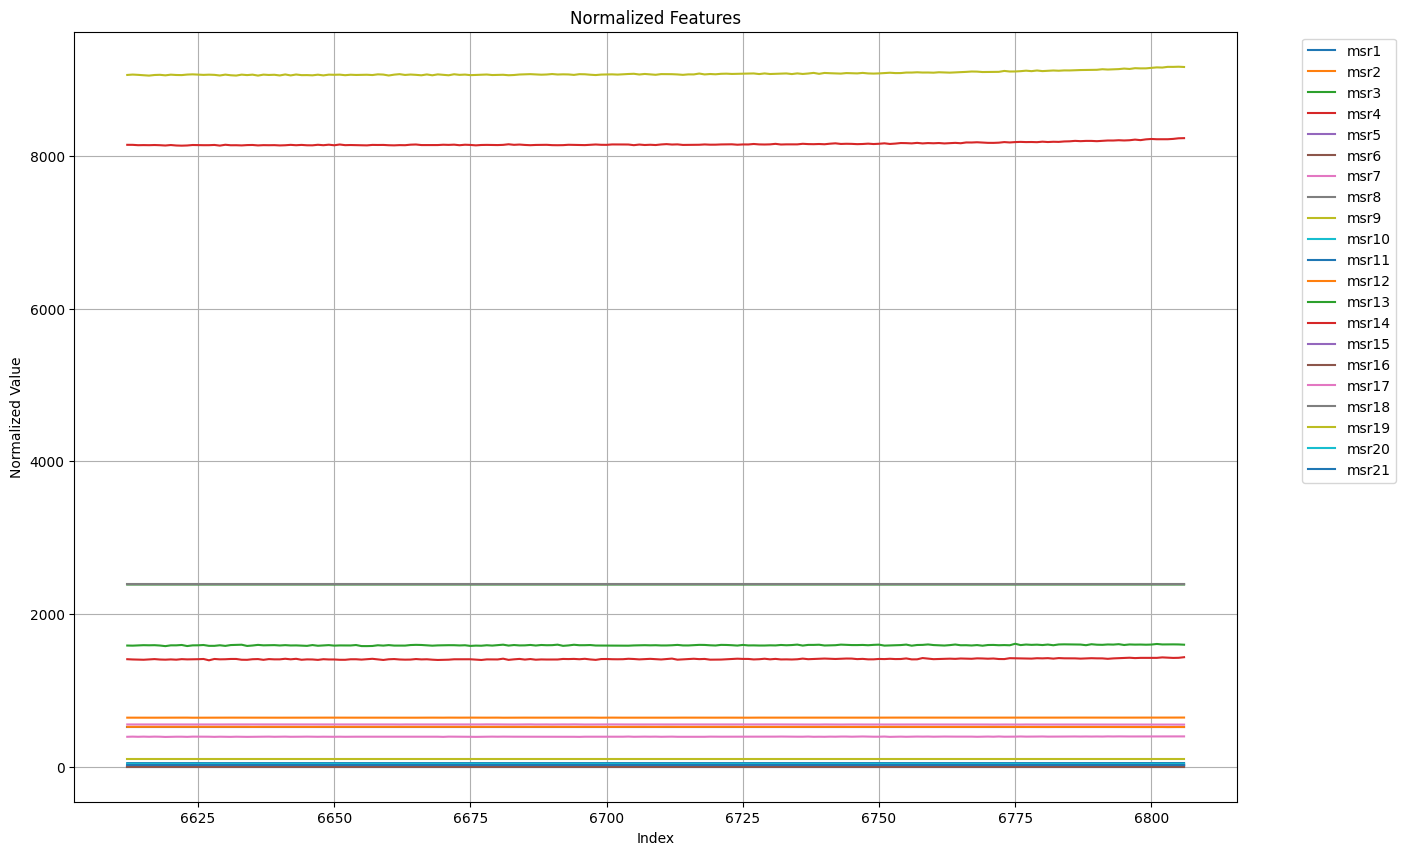

In [365]:
import matplotlib.pyplot as plt

cols_norm = [f'msr{i}' for i in range(1, 22)]

plt.figure(figsize=(15, 10))

limited_features = features[features['unit_number'] == 34]

for feature in cols_norm:
    plt.plot(limited_features[feature], label=feature)

plt.title('Normalized Features')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [366]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['ops1', 'ops2', 'ops3'] + [f'msr{i}' for i in range(1, 22)]
scaler = MinMaxScaler()
features[features_to_normalize] = scaler.fit_transform(features[features_to_normalize])

features.head()

,unit_number,cycle_time,ops1,ops2,ops3,msr1,msr2,msr3,msr4,msr5,...,msr12,msr13,msr14,msr15,msr16,msr17,msr18,msr19,msr20,msr21
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502


In [367]:
from sklearn.model_selection import train_test_split

unique_units = features['unit_number'].unique()

units_train, units_test = train_test_split(unique_units, test_size=0.2, random_state=42)

features_train = features[features['unit_number'].isin(units_train)]
features_test = features[features['unit_number'].isin(units_test)]
targets_train = targets[targets['idx'].isin(units_train)]
targets_test = targets[targets['idx'].isin(units_test)]

# Reset the indices to ensure they are consistent
features_train = features_train.reset_index(drop=True)
features_test = features_test.reset_index(drop=True)
targets_train = targets_train.reset_index(drop=True)
targets_test = targets_test.reset_index(drop=True)

print(targets_test.head())

targets_train = targets_train.drop(columns=['idx'])
targets_test = targets_test.drop(columns=['idx'])

print(targets_test.head())

   idx  RUL
0    1  112
1    5   91
2   11   97
3   13   95
4   19   87
   RUL
0  112
1   91
2   97
3   95
4   87


In [368]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

# TimeSeries
class TimeSeriesDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
        self.unit_numbers = features['unit_number'].unique()
        self.scalers = {unit: StandardScaler() for unit in self.unit_numbers}

    def __len__(self):
        return len(self.unit_numbers)

    def __getitem__(self, idx):
        unit_number = self.unit_numbers[idx]
        unit_data = self.features[self.features['unit_number'] == unit_number]
        unit_data = unit_data.drop(columns=['unit_number']).values
        scaler = self.scalers[unit_number]
        unit_data = scaler.fit_transform(unit_data)
        target = self.targets.iloc[idx].values
        return torch.tensor(unit_data, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

def collate_fn(batch):
    inputs = [item[0] for item in batch]
    targets = torch.stack([item[1] for item in batch])
    lengths = [len(seq) for seq in inputs]
    padded_inputs = torch.nn.utils.rnn.pad_sequence(inputs, batch_first=True)
    return padded_inputs, targets, lengths


In [369]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, lengths):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        packed_input = torch.nn.utils.rnn.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        packed_output, _ = self.gru(packed_input, h0)
        output, _ = torch.nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)
        lengths = lengths.clone().detach()
        out = self.fc(output[range(len(output)), lengths-1])
        return out


In [370]:
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for inputs, targets, lengths in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            lengths = torch.tensor(lengths, device=device).clone().detach() 
            optimizer.zero_grad()
            outputs = model(inputs, lengths)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

train_dataset = TimeSeriesDataset(features_train, targets_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = features_train.shape[1] - 1  # excluding 'unit_number'
hidden_size = 64
output_size = 1
num_layers = 2
num_epochs = 50
learning_rate = 0.001

model = GRUModel(input_size, hidden_size, output_size, num_layers).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_model(model, train_loader, criterion, optimizer, num_epochs)


Epoch [1/50], Loss: 9669.3877
Epoch [11/50], Loss: 8851.6895
Epoch [21/50], Loss: 8471.6123
Epoch [31/50], Loss: 8130.4570
Epoch [41/50], Loss: 7813.0400


In [373]:
def predict(model, test_loader):
    model.eval()
    predictions = []
    true_values = []
    with torch.no_grad():
        for inputs, targets, lengths in test_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            lengths = torch.tensor(lengths, device=device).clone().detach()
            outputs = model(inputs, lengths)
            predictions.append(outputs.cpu().numpy())
            true_values.append(targets.cpu().numpy())
    return np.concatenate(predictions), np.concatenate(true_values)

# Define test_dataset and test_loader
test_dataset = TimeSeriesDataset(features_test, targets_test)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

# Generate predictions
predictions, true_values = predict(model, test_loader)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(true_values, predictions)
mae = mean_absolute_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')



Mean Squared Error (MSE): 4975.8931
Mean Absolute Error (MAE): 59.8623
R-squared (R2): -2.1085
